<a href="https://www.kaggle.com/code/micheldc55/tutorial-data-science-matplotlib-y-seaborn?scriptVersionId=113717037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Tutorial sobre uso de Matplotlib y Seaborn para Data Science

# Estableciendo el entorno de trabajo

Para este módulo utilizaremos dos librerías de uso muy difundido en la ciencia de datos, llamadas **Matplotlib** y **Seaborn**. Los entornos de Kaggle ya tienen esta librería instalada por defecto, pero en caso de no tenerla basta con instalarlas a través de la terminal o a través de un gestor de librerías como Anaconda.

Estas librerías nos permiten **visualizar datos principalmente para nuestro estudio interno**, o para ver rápidamente cómo se comportan los datos, pero **no son las mejores librerías para reporting**, ya que requieren de mucho fine-tuning para obtener un gráfico estéticamente agradable. En general, utilizaremos estas librerías más frecuentemente en el proceso de exploración de datos conocido como **EDA** (Exploratory Data Analysis).

Esto no quiere decir que no podamos utilizar estas librerías en procesos de reporting más formal, solamente que será más costoso y menos eficiente que utilizar otras librerías diseñadas para este fin. Algunas librerías que permiten visualizaciones más orientadas hacia reporting son:
- Plotly
- Altair
- Plotnine (ggplot en Python)
- Bokeh

Siempre que querramos utilizar una de estas librerías, un truco para alivianar el camino es ver los **ejemplos de las galerías** [aquí se muestra el de matplotlib por ejemplo](https://matplotlib.org/stable/gallery/index.html). Estas galerías contienen ejemplos con código que podemos utilizar como base para generar nuestro propio conjunto de visualizaciones a partir de uno que sabemos que funciona. Veremos que principalmente matplotlib es una librería extremadamente flexible y que por lo tanto en teoría podremos hacer todo lo que queramos con nuestros gráficos, si disponemos del tiempo. Seaborn está construido sobre matplotlib, así que lo mismo aplica para esta librería.

Vamos a comenzar importando las librerías. Generalmente no se recomienda utilizar alias de las librerías por legibilidad del código, pero en este caso, las librerías son de uso tan difundido que sabremos inmediatamente que el alias **"plt"** es de **Matplotlib** y el alias **"sns"** es de **Seaborn**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# solo para importar datos de gapminder
import plotly.express as px 

# Teoría visual

Este módulo es una continuación del módulo anterior sobre estadística para ciencia de datos. Si te interesa el tema, se puede acceder a través de este [link](https://www.kaggle.com/code/micheldc55/introducci-n-a-estad-stica-para-data-science). En el  módulo anterior vimos la importancia de las **medidas estadísticas de tendencia central y de dispersión** para entender un conjunto de datos. Pero la pregunta que debemos hacernos a continuación es... ¿es eso suficiente para obtener un conocimiento de los datos en profundidad? La respuesta es que no...

Comenzaremos investigando por qué es necesario investigar visualmente los datos, más allá de las medidas de estadística y los tests/transformaciones que realicemos sobre ellos. Esto se debe a que las medidas estadísticas nos proveen con una forma de medir tendencias generales de nuestros datos, mientras que las visualizaciones nos permiten ver todo nuestro conjunto de datos en una sola figura. Veamos por qué debemos ser cuidadosos con las medidas estadísticas:

Aquí les dejo [otro link muy recomendable](http://rafalab.dfci.harvard.edu/dslibro/principios-de-visualizaci%C3%B3n-de-datos.html) si les interesa el tema.

## El cuarteto de Anscombe

¿Por qué complementar las medidas estadísticas con visualización? En 1971, el estadístico Frank Anscombe presentó estos 4 gráficos que podemos ver debajo. En ellos vemos 4 gráficos que visualmente son muy distintos, pero sus estadísticos de tendencia, regresión, dispersión y correlación son exactamente iguales! La imagen fue tomada de este [link](https://tereom.github.io/est-computacional-2018/introduccion-a-visualizacion.html#el-cuarteto-de-ascombe).

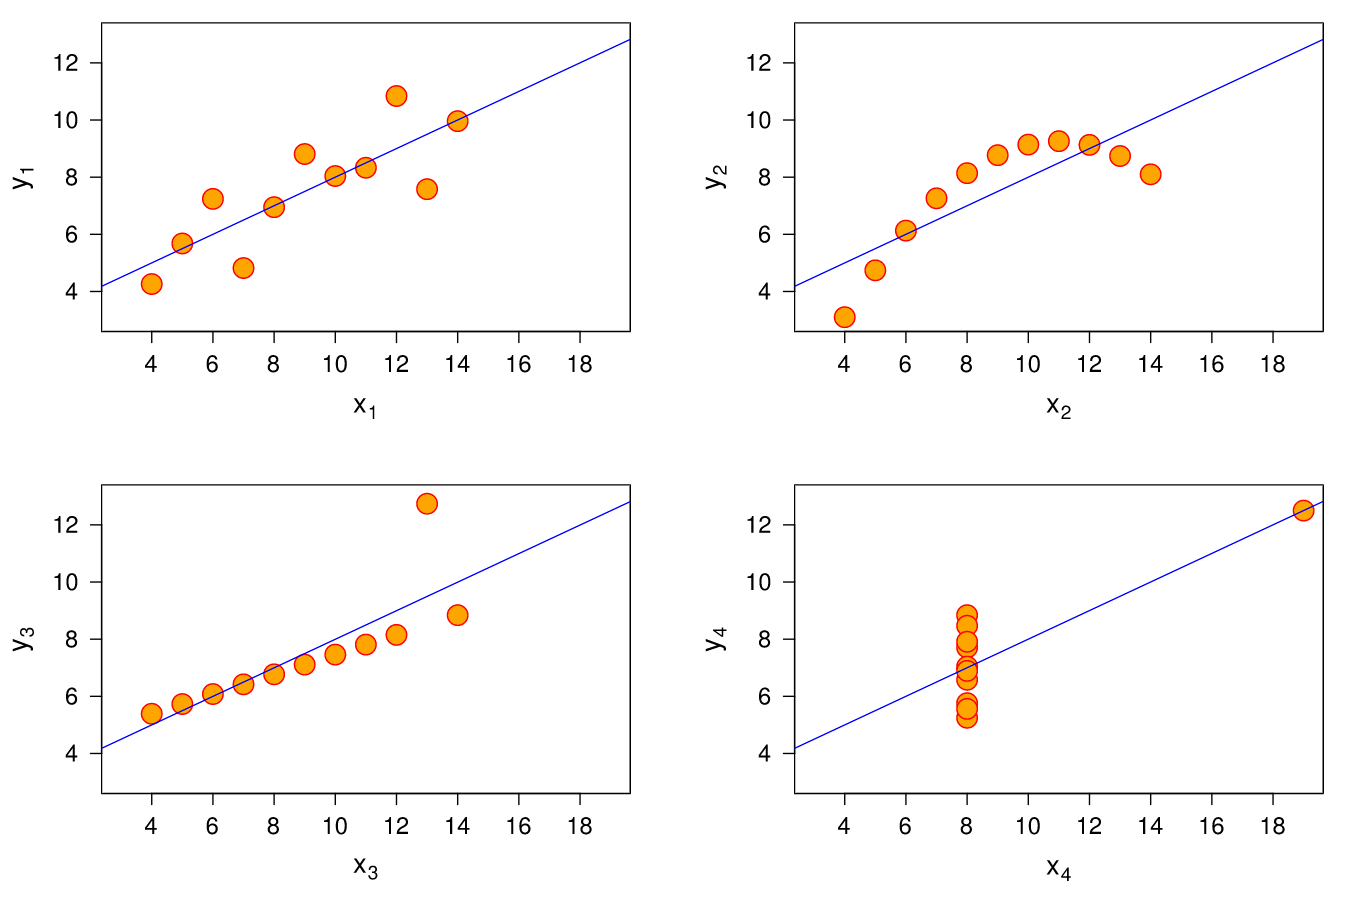

Los conjuntos que se muestran en este gráfico tienen:
- Media (en x) de 9
- Media (en y) de 7.5
- Varianza (en x) de 11
- Varianza (en y) de 4.12
- Correlación (entre x e y) de 0.816
- Recta de regresión de la forma y = 3 + 0.5 * x

Básicamente, mirando las medidas de estadística descriptiva más frecuentes aplicadas a los conjuntos de datos, estas variables serían iguales, pero en la práctica son muy diferentes. Por esto es que siempre debemos utilizar la visualización en conjunto con los métodos estadísticos. La **visualización complementa a la estadística**!

## Visualización de datos en estadística

Como ya hemos mencionado la estadística tradicionalmente se divide en **dos partes**: una parte de más **exploratoria**, donde buscamos entender cómo se comportan los datos de una forma visual, y una parte **inferencial**, donde intentamos evaluar nuestras suposiciones sobre los datos. Estas dos partes tienen mucha interacción en la práctica, pero históricamente siempre se valorizó más a la parte inferencial que a la exploratoria.

Aunque en el proceso de inferencia la visualización es cada vez más importantes, la **visualización** es claramente parte del **análisis exploratorio de datos**. Con el paso del tiempo se ha desarrollado una **teoría de visualización de datos**, en la que se marcan algunas pautas de buenas prácticas para los gráficos.

Veamos algún ejemplo que nos permita ver intuitivamente cómo hay algunos gráficos que son mejores para visualizar datos! Para esto, utilizaremos los datos del titanic, un dataset histórico dentro del mundo de la ciencia de datos que se utiliza para intentar predecir si pasajero del titanic sobrevivirán en función de algunas características. Lo importamos debajo.

In [2]:
titanic = pd.read_csv('../input/titanic/train.csv')
# Quitamos los valores decimales que vienen por defecto en edades menores a 1 año
titanic.loc[titanic['Age'] < 1, 'Age'] = 0

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Veamos un ejemplo de una mala visualización vs una buena visualización:

Supongamos que queremos visualizar la cantidad de personas que tienen cada edad dentro de los datos. Queremos saber cuantas personas tienen 80 años, cuantas personas tienen 79 años, etc.

#### Gráfico de tarta:

Si quisiéramos visualizar la cantidad de personas que tienen cada edad, una **mala** idea sería visualizarlo en un **gráfico de tarta**. El gráfico de torta nunca es recomendable, porque los seres humanos no somos buenos para medir diferencias angulares. Pero en este caso particular es aún peor. Esto es porque la edad, a pesar de poder considerarse como una variable "categórica" (que solo toma un número discreto de valores), tiene muchos valores posibles a tomar, esto hace que haya muchísimas "categorías".

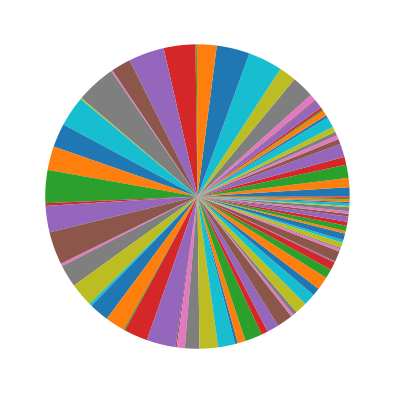

In [3]:
df_for_pie = titanic.groupby('Age').size()
plt.figure(figsize=(7,7))
plt.pie(df_for_pie);

#### Tabla de valores

Una segunda iteración mejor continuando con este concepto podría ser utilizar una **tabla** como visualización. La tabla tendría como columnas la edad y la cantidad de personas que tienen esa edad. Esto visualmente es mucho más sencillo de procesar, pero tiene el defecto de que aún hay

In [4]:
tabla_edades = pd.DataFrame(df_for_pie).reset_index().rename(columns={0: 'cantidad_personas'})
tabla_edades

,Age,cantidad_personas
0,0.0,7
1,1.0,7
2,2.0,10
3,3.0,6
4,4.0,10
...,...,...
79,70.0,2
80,70.5,1
81,71.0,2
82,74.0,1


Incluso podríamos ver cuales son las edades más comunes dentro del Titanic:

In [5]:
tabla_edades.sort_values('cantidad_personas', ascending=False).head()

,Age,cantidad_personas
27,24.0,30
24,22.0,27
19,18.0,26
35,30.0,25
32,28.0,25


#### Histograma

La verdadera solución es graficar un histograma, que considera la edad como una variable numérica y por lo tanto se ajusta mejor a las necesidades del problema. Una vez que encontramos la visualización, aún nos falta modificarla para hacerla visualmente más atractiva, pero eso lo veremos más adelante.

<AxesSubplot:xlabel='Age', ylabel='Count'>

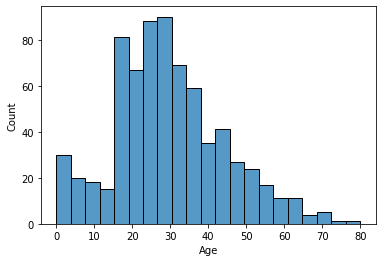

In [6]:
sns.histplot(data=titanic, x='Age')

En nuestro caso, no nos interesa entrar de lleno en la **Teoría de la Visualización de datos**, pero si te interesa el tema, esta es una buena lectura para [comenzar](https://tereom.github.io/est-computacional-2018/teoria-de-visualizacion-de-datos.html) aunque mi recomendación es este libro que contiene muchísima información sobre cómo presentar visualizaciones que cuenten una historia [(storytelling with data)](https://www.storytellingwithdata.com/).

Si te interesa aprender qué tipo de gráficos es útil para qué tipo de datos, esta [guía](https://cloud.google.com/blog/products/data-analytics/different-types-graphs-charts-uses) de google puede orientarte mejor.

# Introducción a Matplotlib

La librería de matplotlib permite crear todo tipo de figuras, tanto estáticas, como animadas y/o interactivas, aunque principalmente la utilizaremos para la creación de figuras estáticas. Generalmente la utilizaremos como librería para graficar rápidamente datos y poder hacernos una idea de nuestros datos.

## Gráfico en base a figuras

Matplotlib tiene una dinámica de graficado muy similar a MATLAB, en la que se genera una figura con un conjunto de ejes sobre los que podemos realizar nuestros gráficos. Estas figuras y gráficos tienen muchísimas propiedades y métodos que utilizaremos para modificar lo que queramos de la figura.

Veremos que Matplotlib trabaja con las modificaciones sobre los gráficos en dos niveles:
- A nivel de figura, donde podremos editar elementos de la figura activa
- A nivel de ejes, donde podremos editar elementos relativos a los ejes sobre los que se construye la figura.

Una de las grandes dificultades de matplotlib es que encontraremos que podemos hacer casi todo lo que queramos a nivel de figura Y a nivel de eje, entonces a veces es dificil saber cuál utilizar. Personalmente, la documentación y la mayoría de los ejemplos están hechos a nivel de ejes, así que siempre intento utilizar este si es posible.

### La figura de matplotlib:

La **figura** es el primer elemento que veremos en esta librería. Es el objeto que se crea cada vez que graficamos y podemos definirlo antes de realizar un gráfico, o no definirlo y que matplotlib lo cree por nosotros. 

Veremos que tenemos acceso a modificar mucho dentro de una figura, y generalmente es algo más fácil de modificar cuando hacemos un único gráfico. Cuando hagamos varios gráficos o utilicemos Seaborn, será más sencillo utilizar ejes que figuras, pero los métodos y nombres son prácticamente iguales para ambos. Un dato interesante... La figura de abajo ha sido creada con Matplotlib!!

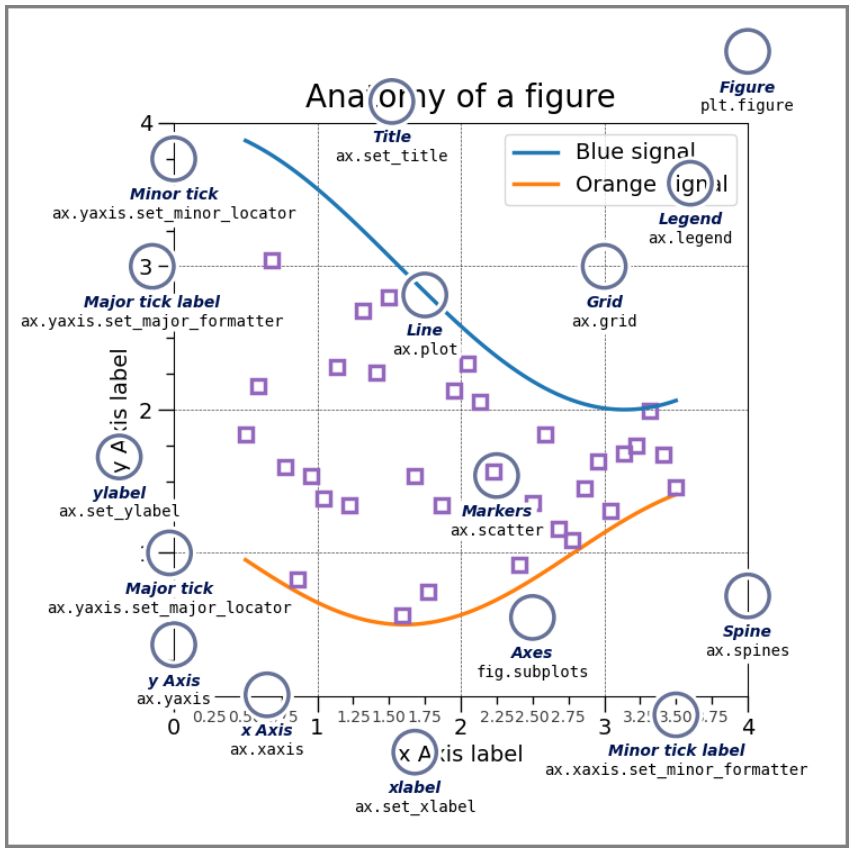

Vamos a aprender a utilizar Matplotlib en el sentido inverso a lo que haríamos normalmente. Vamos a ver una figura e intentar replicarla utilizando esta librería! Lo primero es que utilizaremos los datos de una competencia llamada gapminder. Para no tener que establecer otra conexión a datos de Kaggle, vamos a importarla directamente de la librería de Plotly Express, que ya trae este dataset listo para utilizar.

El dataset contiene información sobre distintos países del mundo, la región en la que están ubicados, su población, esperanza de vida, PBI per cápita y el código del país ISO-3.

In [7]:
gapminder = px.data.gapminder()
gapminder.sample(5, random_state=101)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1313,Saudi Arabia,Asia,1977,58.690,8128505,34167.762600,SAU,682
299,China,Asia,2007,72.961,1318683096,4959.114854,CHN,156
665,"Hong Kong, China",Asia,1977,73.600,4583700,11186.141250,HKG,344
543,Gabon,Africa,1967,44.598,489004,8358.761987,GAB,266
723,Iran,Asia,1967,52.469,26538000,5906.731805,IRN,364


In [8]:
gapminder = gapminder[gapminder['year'] == 2007]
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


Intentaremos replicar esta [figura](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1)...

### Creando la figura

Lo primero que debemos hacer es crear la figura que utilizaremos para graficar. Hay dos métodos para crear una figura: 
1) El primero es simplemente ejecutando la función plt.figure(). Esta función tiene un argumento opcional llamado figsize que será una tupla con el tamaño que queremos que tenga nuestra figura: (ancho, alto)

2) El segundo es generando un subplot (igual al concepto de subplot de MATLAB). El subplot devuelve la figura y los ejes, así que podemos elegir donde queremos realizar las modificaciones (a nivel de eje o de figura).

Utilizaremos para este ejemplo la figura, ya que solo necesitamos mostrar un gráfico. 

Algo importante a tener en cuenta es que no siempre ejecutaremos estos programas desde un notebook. Muchas veces ejectuaremos desde scripts, y por defecto los scripts de Python no muestran las visualizaciones como sí lo hacen los notebooks. Si queremos ver nuestras visualizaciones y las estamos ejecutando en un script, debemos utilizar la función plt.show(). En este caso estará siempre comentada, pero si lo ejecutan en un script deberan quitar la almohadilla para poder ver el resultado.

In [9]:
fig = plt.figure(figsize=(12,8))

## Si quisieramos utilizar subplots:
#fig2, ax = plt.subplots(2, 2, figsize=(12,16))
## En este caso el figsize conforma a la suma de los dos gráficos. Como estamos haciendo un
## gráfico de 2 x 1, debemos duplicar la altura respecto a la figura anterior (fig).

<Figure size 864x576 with 0 Axes>

#### Seleccionando el tipo de gráfico

Si repasamos lo que queremos graficar, veremos que el eje x tiene información sobre el PBI per capita (que en el DataFrame está como gdpPercap) contra la esperanza de vida (lifeExp). Así que comenzaremos por estos dos valores. Ambos son valores numéricos, por lo que la primera aproximación siempre será un scatterplot (gráfico de puntos). Podemos hacer un scatterplot en matplotlib con la función:

```python
plt.scatter(x, y, data)
```
- x es el nombre de la columna que queremos graficar en el eje x
- y es el nombre de la columna que queremos graficar en el eje y
- data es el nombre del DataFrame donde matplotlib debe buscar estas columnas

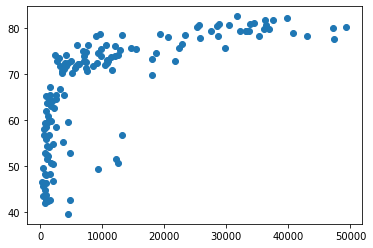

In [10]:
plt.scatter(x='gdpPercap', y='lifeExp', data=gapminder)
#plt.show()

Esto no se parece en nada al gráfico que tenemos como referencia, pero es un comienzo... Si observamos la escala del eje x del gráfico final, veremos que está en escala logarítmica en lugar de en escala regular. Esto lo sabemos porque los números se duplican en cada tick del eje x.

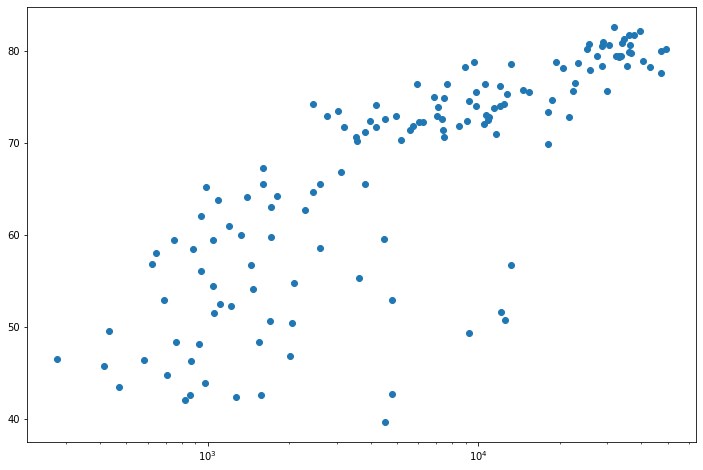

In [11]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x='gdpPercap', y='lifeExp', data=gapminder)
plt.xscale('log')
#plt.show()

Y si quisiéramos hacerlo con subplots? Sería lo mismo, solo que graficaríamos sobre cada uno de los ejes en lugar de graficar sobre la figura. Esto es porque debemos especificar sobre qué eje queremos hacer el gráfico que estamos pidiendo. Básicamente la sintáxis será

```python
# Para figuras:
plt.figure(figsize=(...))
plt.scatter(x, y, data, etc..)

# Para ejes:
fig, ax = plt.subplots(2, 2, figsize=(...))
# ax ahora es un array de ejes de 2x2
ax[0][0].scatter(x1, y1, data)
ax[1][0].scatter(x2, y2, data)
ax[0][1].scatter(x3, y3, data)
ax[1][1].scatter(x4, y4, data)
```

Si quisiéramos graficar:
- gdpPercap vs lifeExp
- gdpPercap vs year
- lifeExp vs pop
- gdpPercap vs pop

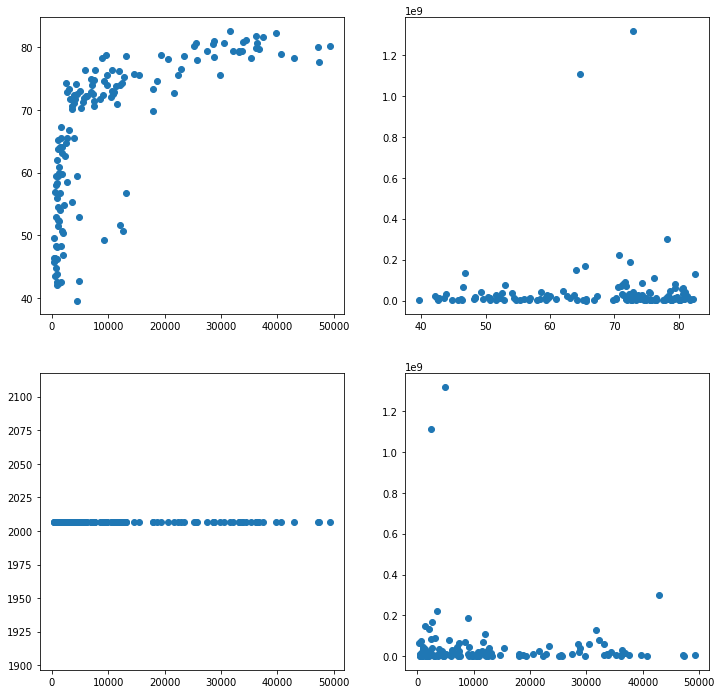

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].scatter('gdpPercap', 'lifeExp', data=gapminder)
ax[1][0].scatter('gdpPercap', 'year', data=gapminder)
ax[0][1].scatter('lifeExp', 'pop', data=gapminder)
ax[1][1].scatter('gdpPercap', 'pop', data=gapminder)

#### Agregando títulos y etiquetas a los ejes
 
 Podemos agregar títulos a nuestras figuras utilizando la función plt.title()
```python
# Para figuras:
plt.figure(figsize=(...))
plt.title('Insertar el titulo aqui')

# Para ejes:
fig, ax = plt.subplots(1, 1, figsize=(...))
# ax ahora es un array de ejes de 2x2
ax.set_title('Insertar el titulo aqui')
```
También podemos agregar etiquetas a los ejes para indicar qué variable representa cada uno. Por ejemplo, como graficamos el PBI en el eje x, y la esperanza de vida en el eje y, sería buena idea agregarlo para facilitar la interpretación de los datos.

```python
# Para figuras:
plt.figure(figsize=(...))
plt.xlabel('Insertar el etiqueta del eje x aqui')
plt.ylabel('Insertar el etiqueta del eje y aqui')

# Para ejes:
fig, ax = plt.subplots(1, 1, figsize=(...))
# ax ahora es un array de ejes de 1x1
ax.set_xlabel('Insertar el etiqueta del eje x aqui')
ax.set_ylabel('Insertar el etiqueta del eje y aqui')
```

Text(0, 0.5, 'Esperanza de vida')

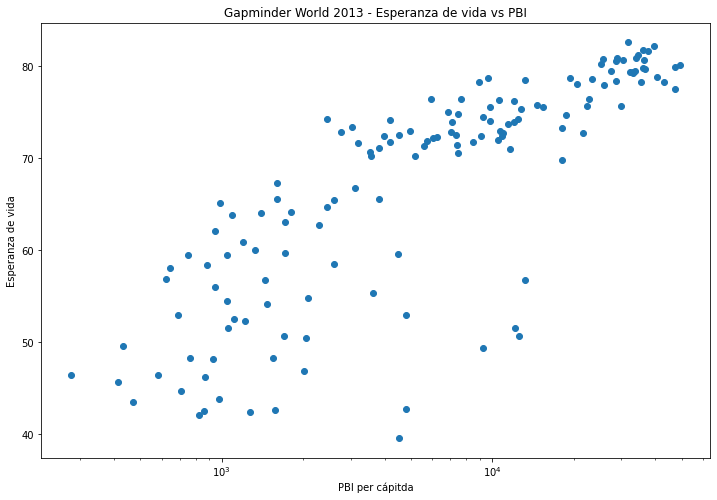

In [13]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x='gdpPercap', y='lifeExp', data=gapminder)
plt.xscale('log')
plt.title('Gapminder World 2013 - Esperanza de vida vs PBI')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
#plt.show()

#### Definiendo los límites del gráfico:

Si vemos el gráfico original, vemos que los límites de los ejes están ajustadas a los datos. Matplotlib suele ajustar los datos a las magnitudes del gráfico, pero a veces los valores atípicos pueden dificultar la comprensión y modificar los límites puede simplificar la comprensión. Si quieremos modificar los límites del eje x, y del eje y podemos:

```python
# A nivel de figura
plt.xlim(x_minimo, x_maximo)
plt.ylim(y_minimo, y_maximo)

# A nivel de ejes
fig, ax = plt.subplots(1, 1, figsize=(...))

ax.set_xlim(x_minimo, x_maximo)
ax.set_ylim(x_minimo, x_maximo)
```

(33.67105, 86.73315)

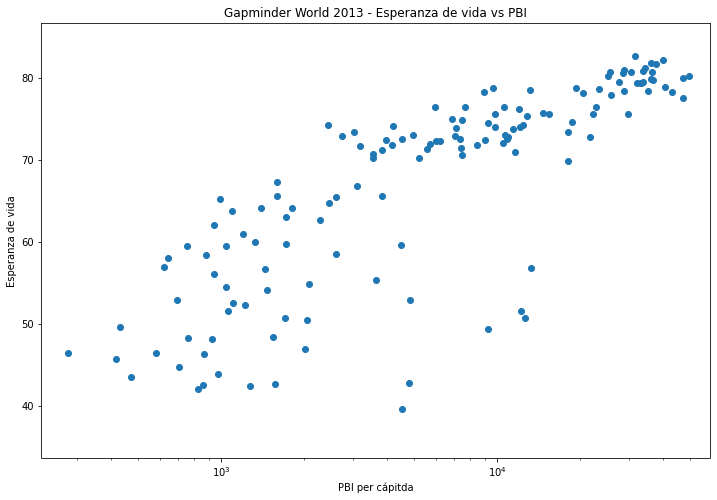

In [14]:
x_data = gapminder['gdpPercap']
y_data = gapminder['lifeExp']

fig = plt.figure(figsize=(12,8))
plt.scatter(x='gdpPercap', y='lifeExp', data=gapminder)
plt.xscale('log')
plt.title('Gapminder World 2013 - Esperanza de vida vs PBI')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
plt.xlim(0.80 * x_data.min(), 1.20 * x_data.max())
plt.ylim(0.85 * y_data.min(), 1.05 * y_data.max())
#plt.show()

In [15]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


#### Definiendo el color del gráfico:

La función plt.scatter() tiene un argumento llamado "c" (por la palabra color). Podemos utilizar este argumento para pasarle un color y cambiar todos los puntos del gráfico a otro color. O podemos pasarle el color que queremos para cada uno de los elementos del gráfico como un array o serie. 

Haremos la segunda definiendo un diccionario que mapearemos a la columna continente. Si vemos el gráfico original, veremos que tiene 5 colores, uno por cada continente. Así que crearemos un diccionario que mapee los nombres de los continentes al color que queremos para ese continente. Luego crearemos una columna nueva que será el color asignado a cada registro del DataFrame. Ese será el input para el argumento "c".

También aparece otro argumento importante, el alpha (factor de opacidad entre 0 y 1). El valor alpha más cercano a cero se vuelve menos opaco y nos permite ver zonas de acumulación de puntos con más claridad.

```python
plt.scatter(x, y, data, c='color o array de colores para cada punto', alpha='opacidad (entre 0 y 1)')
```

Debajo creamos la columna 'color' convirtiendo cada uno de los continentes a un color diferente con un diccionario que los mapea uno a uno.

In [16]:
color_mapping_dict = {
    'Asia': 'red', 'Europe': 'green', 'Africa': 'blue', 'Americas': 'yellow', 'Oceania': 'black'
}

gapminder['color'] = gapminder['continent'].map(color_mapping_dict)
gapminder.sample(5, random_state=10)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,color
239,Cameroon,Africa,2007,50.430,17696293,2042.095240,CMR,120,blue
1091,Netherlands,Europe,2007,79.762,16570613,36797.933320,NLD,528,green
1187,Panama,Americas,2007,75.537,3242173,9809.185636,PAN,591,yellow
131,Benin,Africa,2007,56.728,8078314,1441.284873,BEN,204,blue
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,green


(33.67105, 86.73315)

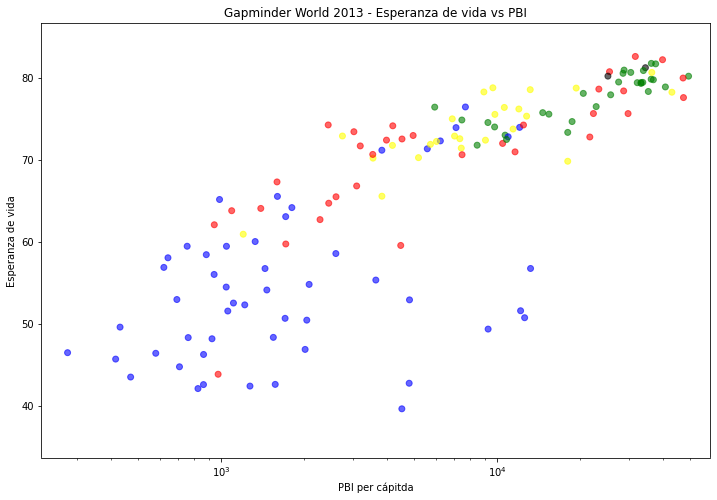

In [17]:
x_data = gapminder['gdpPercap']
y_data = gapminder['lifeExp']

fig = plt.figure(figsize=(12,8))
plt.scatter(x="gdpPercap",y="lifeExp",data=gapminder, c=gapminder["color"],alpha=0.6)
plt.xscale('log')
plt.title('Gapminder World 2013 - Esperanza de vida vs PBI')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
plt.xlim(0.80 * x_data.min(), 1.20 * x_data.max())
plt.ylim(0.85 * y_data.min(), 1.05 * y_data.max())
#plt.show()

#### Cambiando el tamaño del marcador:

Ahora el gráfico es mucho más parecido a lo que teníamos antes. Solamente nos queda cambiar los tamaños de los marcadores y agregar algunos detalles más. La función de plt.scatter() tiene un argumento llamado "s" (de size en inglés) que permite cambiar el tamaño del marcador en el gráfico. 

Esto nos permite agregar otra dimensión a nuestro gráfico. Si quisiéramos grafica esperanza de vida vs PBI vs población, deberíamos hacer un gráfico de 3 ejes perpendiculares. Esto dificulta mucho la visualización y la comprensión. Una forma de introducir esa dimensión extra dentro del gráfico es modificando el tamaño de los puntos en función de la población.

Esto nos permite mantener el gráfico plano, que se comprende mucho mejor. El tamaño debe ser un entero o flotante y puede ser un valor único (esto cambia el tamaño de todos los puntos) o un array de valores de tamaño para cada uno de los puntos. Haremos la segunda...

```python
plt.scatter(x, y, data, c, alpha, s='tamaño del marcador a utilizar')
```

In [18]:
# Las diferencias en población son muy grandes, así que reescalamos dividiendo entre el mínimo
markersize = gapminder['pop'] / gapminder['pop'].min()
markersize

11      159.785964
23       18.040590
35      167.017652
47       62.233381
59      201.934708
           ...    
1655    427.211059
1667     20.134042
1679    111.292987
1691     58.854063
1703     61.685563
Name: pop, Length: 142, dtype: float64

(33.67105, 86.73315)

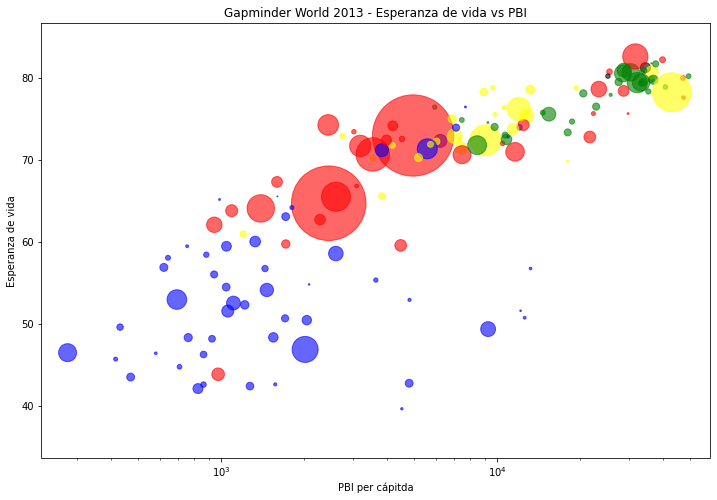

In [19]:
x_data = gapminder['gdpPercap']
y_data = gapminder['lifeExp']
markersize = gapminder['pop'] / gapminder['pop'].min()

fig = plt.figure(figsize=(12,8))
plt.scatter(x="gdpPercap",y="lifeExp",data=gapminder, c=gapminder["color"], alpha=0.6, s=markersize)
plt.xscale('log')
plt.title('Gapminder World 2013 - Esperanza de vida vs PBI')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
plt.xlim(0.80 * x_data.min(), 1.20 * x_data.max())
plt.ylim(0.85 * y_data.min(), 1.05 * y_data.max())
#plt.show()

#### Generando las leyendas

La leyenda en el gráfico es una ayuda que nos permite identificar rápidamente a qué categoría corresponde cada punto. En este caso, nos interesaría una leyenda para poder asociar los colores de los puntos a cada uno de los continentes.

Para eso, debemos generar "patches" de matplotlib. Los patches de matplotlib son objetos que nos permiten establecer una relación entre una categoría de un gráfico, un valor específico que toma esa categoría y la etiqueta que queremos que aparezca en la leyenda.

In [20]:
from matplotlib.patches import Patch

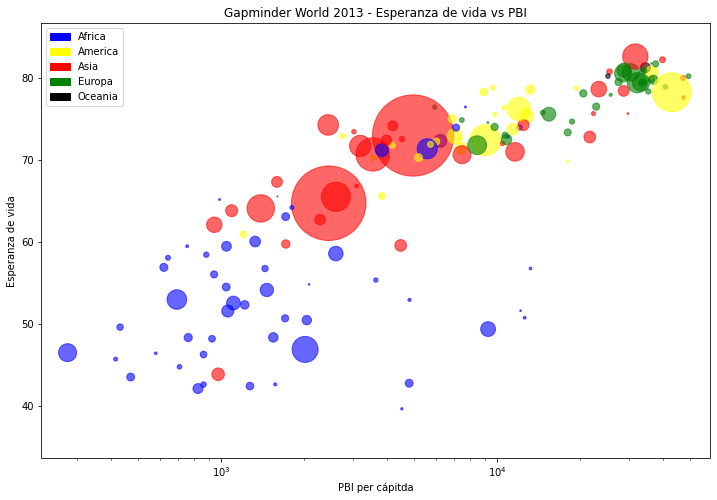

In [21]:
x_data = gapminder['gdpPercap']
y_data = gapminder['lifeExp']
markersize = gapminder['pop'] / gapminder['pop'].min()

africa = Patch(color='blue', label='Africa')
americas = Patch(color='yellow', label='America')
asia = Patch(color='red', label='Asia')
europa = Patch(color='green', label='Europa')
oceania = Patch(color='black', label='Oceania')

fig = plt.figure(figsize=(12,8))
plt.scatter(x="gdpPercap",y="lifeExp",data=gapminder, c=gapminder["color"], alpha=0.6, s=markersize)
plt.xscale('log')
plt.title('Gapminder World 2013 - Esperanza de vida vs PBI')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
plt.xlim(0.80 * x_data.min(), 1.20 * x_data.max())
plt.ylim(0.85 * y_data.min(), 1.05 * y_data.max())

plt.legend(handles=[africa, americas, asia, europa, oceania])
#plt.show()

#### Escribiendo sobre el gráfico

Podemos usar la función plt.text() para escribir directamente sobre el texto. La función toma como argumento las coordenadas x e y donde queremos graficar el texto, y el input de texto que queremos mostrar.

```python
plt.text(x='coordenada x donde colocar el texto', y='coordenada y donde colocar el texto', s='texto')
```

Crearemos una función sencilla que dado el nombre de un país extraiga del DataFrame de gapminder las coordendas x e y (gdp y lifeExp), para poder escribir rápidamente.

In [22]:
def extract_xy(nombre, data):
    x = data[data['country'] == nombre]['gdpPercap'].values[0]
    y = data[data['country'] == nombre]['lifeExp'].values[0]
    
    return 0.8 * x, y

# We can use this to plot all the text annotations in the map in less lines of code
for country in ['India', 'Spain', 'Tanzania', 'United States', 'Uruguay']:
    x, y = extract_xy(country, gapminder)
    print(country, x, y)

India 1961.7683256 64.69800000000001
Spain 23056.85096 80.941
Tanzania 885.9857456 52.517
United States 34361.322472 78.242
Uruguay 8489.170392 76.384


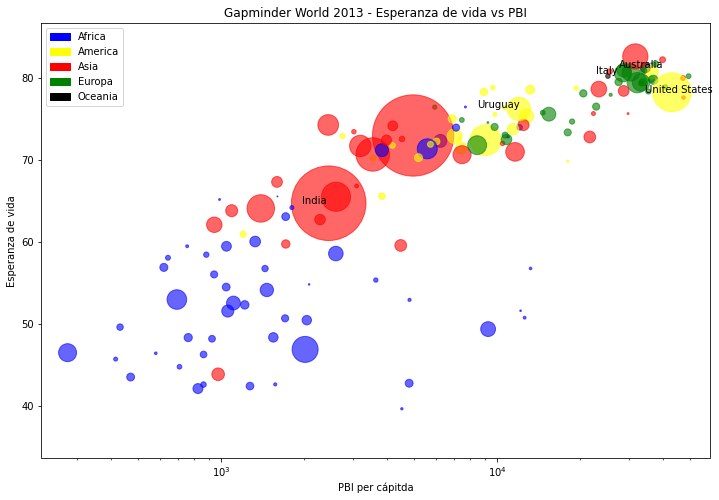

In [23]:
x_data = gapminder['gdpPercap']
y_data = gapminder['lifeExp']
markersize = gapminder['pop'] / gapminder['pop'].min()

africa = Patch(color='blue', label='Africa')
americas = Patch(color='yellow', label='America')
asia = Patch(color='red', label='Asia')
europa = Patch(color='green', label='Europa')
oceania = Patch(color='black', label='Oceania')

fig = plt.figure(figsize=(12,8))
plt.scatter(x="gdpPercap",y="lifeExp",data=gapminder, c=gapminder["color"], alpha=0.6, s=markersize)
plt.xscale('log')
plt.title('Gapminder World 2013 - Esperanza de vida vs PBI')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
plt.xlim(0.80 * x_data.min(), 1.20 * x_data.max())
plt.ylim(0.85 * y_data.min(), 1.05 * y_data.max())
plt.legend(handles=[africa, americas, asia, europa, oceania])

for country in ['India', 'Italy', 'Uruguay', 'United States', 'Australia']:
    x, y = extract_xy(country, gapminder)
    plt.text(x, y, country)

#plt.show()

#### Últimos detalles

Podemos agregar otros elementos como títulos más específicos utilizando el método .suptitle() sobre la figura. El suptitle sobreescribe al titulo que hayamos elegido.

Text(0.5, 0.98, 'Gapminder World 2013 - Esperanza de vida vs PBI vs Población')

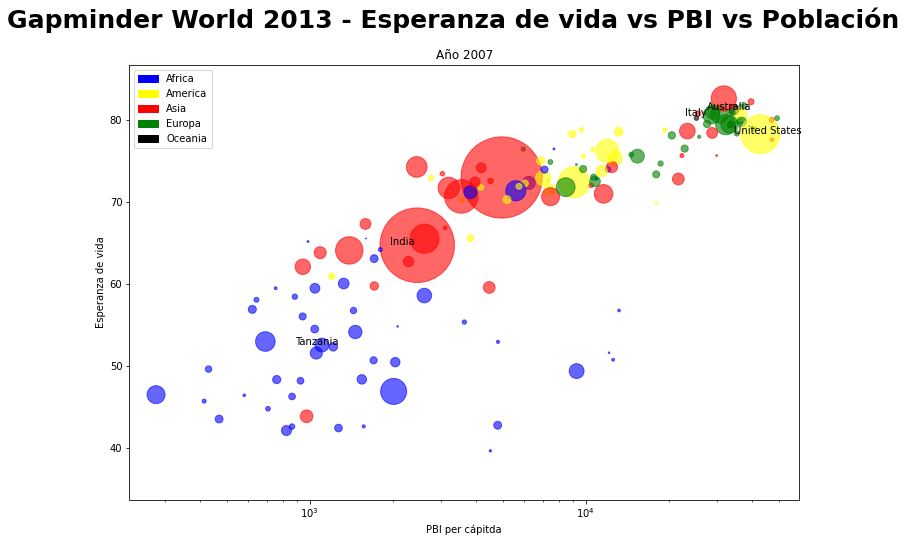

In [24]:
x_data = gapminder['gdpPercap']
y_data = gapminder['lifeExp']
markersize = gapminder['pop'] / gapminder['pop'].min()

africa = Patch(color='blue', label='Africa')
americas = Patch(color='yellow', label='America')
asia = Patch(color='red', label='Asia')
europa = Patch(color='green', label='Europa')
oceania = Patch(color='black', label='Oceania')

fig = plt.figure(figsize=(12,8))
plt.scatter(x="gdpPercap",y="lifeExp",data=gapminder, c=gapminder["color"], alpha=0.6, s=markersize)
plt.xscale('log')
plt.title('Año 2007')
plt.xlabel('PBI per cápitda')
plt.ylabel('Esperanza de vida')
plt.xlim(0.80 * x_data.min(), 1.20 * x_data.max())
plt.ylim(0.85 * y_data.min(), 1.05 * y_data.max())
plt.legend(handles=[africa, americas, asia, europa, oceania])

for country in ['India', 'Italy', 'Tanzania', 'United States', 'Australia']:
    x, y = extract_xy(country, gapminder)
    plt.text(x, y, country)

fig.suptitle("Gapminder World 2013 - Esperanza de vida vs PBI vs Población", fontsize=25, fontweight='bold')
#plt.show()

# Introducción a Seaborn

Seaborn es una librería construida **sobre** matplotlib, que nos ofrece una API para poder realizar rápidamente gráficos más estéticos sin tener que desarrollarlos nosotros. Seaborn cambia la paleta de colores de matplotlib por una más estética y suave. También agrega el grid de fondo por defecto que ayuda a interpretar rápidamente las visualizaciones.

Al igual que matplotlib, Seaborn tiene una API de uso común para todos los gráficos. Esto quiere decir que los gráficos en esta herramienta se contruyen sobre los mismos parámetros. Todos tendrán:

- **data**: En donde pasaremos el DataFrame de donde queremos leer los datos
- **x:** El nombre de la columna de donde queremos leer los valores del eje x
- **y:** El nombre de la columna de donde queremos leer los valores del eje y
- **hue**: Permite indicar si queremos establecer una separación entre dos categorías (por ejemplo graficar el nivel educativo de las personas en dos colores diferentes para ver si hay diferencias entre unos y otros)
- **color**: Nos permite definir el color de los elementos del gráfico (similar al "c" de matplotlib)
- **palette:** Nos permite cambiar la paleta de colores por defecto del gráfico.

Vamos a explorar el dataset de titanic con Seaborn para ver qué encontramos...

In [25]:
titanic = pd.read_csv('../input/titanic/train.csv')

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Es interesante ver primero algunos estadísticos generales sobre los datos. Comenzaremos con los estadísticos sobre las variables numéricas:

In [27]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vamos a simplificar el problema y quedarnos solamente con las variables de Edad, Género, y la clase en la que viajaba cada pasajero. Obviamente debemos conservar también si los pasajeros sobreviven o no, ya que es lo que queremos entender del problema.

In [29]:
simple_titanic = titanic[['Age', 'Sex', 'Pclass', 'Survived']]
simple_titanic

,Age,Sex,Pclass,Survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0
...,...,...,...,...
886,27.0,male,2,0
887,19.0,female,1,1
888,NaN,female,3,0
889,26.0,male,1,1


## Visualizando variables con Seaborn

Seaborn tiene varios tipos de gráfico que son útiles para ver distintos tipos de datos. En general diremos que tenemos 2 tipos de datos para visualizar. Los tipos de datos **numéricos (continuos)** y los **categóricos**. Dentro de los categóricos también veremos que existen categóricos regulares y categóricos **ordinales**.

### Datos continuos

Los datos continuos son aquellos que se comportan como una variable continua. Esto quiere decir que los datos pueden tomar un número infinito de valores, ya sea porque pueden tomar cualquier valor natural, cualquier valor entero o incluso cualquier valor flotante. Al ser valores que tienen una infinidad de posibilidades, no podemos tratar cada uno de sus valores como un grupo, sino que debemos estudiarlos en términos de distribución o agrupamiento.

Algunos gráficos útiles para estudiar este tipos de datos por separado son:

- **Histograma**: sns.histplot() --> Subdivide los datos en N categorías (bins) que básicamente son rangos de valores. Y cuenta cuantos registros caen dentro de ese rango de valores. Básicamente estamos aproximando la función de distribución por conteos.
- **Función de densidad** (histograma normalizado): sns.kdeplot() --> Intenta estimar la función de distribución.
- **Boxplots** (graficos de caja): Nos permiten ver la distribución de una forma simplificada. El boxplot divide los datos en cuartiles. Los cuartiles son los valores que dividen los valores de la variable en 25%, 50% (la mediana) y 75%. El boxplot muestra una caja en donde estará el 50% de los datos. Lo hace graficando estos dos extremos (25% y 75%) junto con la mediana.

La **edad** es una variable continua, porque puede tomar cualquier valor. Podemos intentar subdividirla y convertirla a otro tipo de variable, pero así como está en el dataset será una variable continua. Por lo tanto, podemos estudiar su distribución con un histograma:

<AxesSubplot:xlabel='Age', ylabel='Count'>

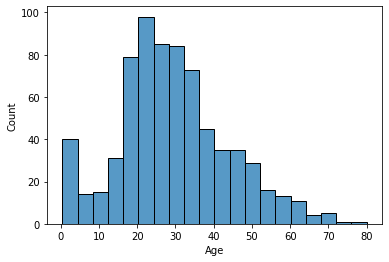

In [30]:
sns.histplot(data=simple_titanic, x='Age', bins=20)

Vemos que las edades más frecuentes son entre 18 y unos 35 años. También vemos que hay una frecuente aparición de niños de entre 0 y unos 3 años. Podemos intentar estimar la distribución de estos datos utilizando un **kde plot**.

<AxesSubplot:xlabel='Age', ylabel='Density'>

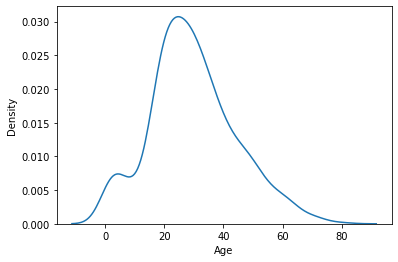

In [31]:
sns.kdeplot(data=simple_titanic, x='Age')

<AxesSubplot:ylabel='Age'>

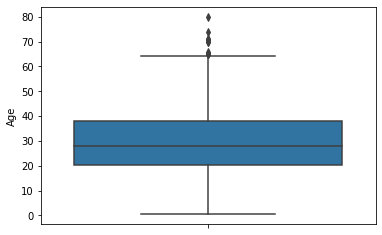

In [32]:
sns.boxplot(data=simple_titanic, y='Age')

El boxplot es un buen recurso para detectar valores anómalos. Si vemos la caja azul del gráfico, dentro de esa caja está contenido el 50% de los datos. Esto se conoce comunmente como el rango intercuartílico (la diferencia entre el valor del cuartil1 (25%) y el valor del cuartil3 (75%). Si vemos encima y debajo de la caja, veremos que hay unas líneas rectas que se cortan perpendicularmente más arriba. Estos son los "bigotes" o whiskers del gráfico.

Estos bigotes se colocan a una distancia de 1,5 veces el rango intercuartílico por encima y por debajo de la caja. Si vemos valores que están por fuera de este rango, esos valores son grandes candidatos a outliers, ya que están muy por fuera de donde se acumulan todos los valores de nuestros datos.

### Datos categóricos

Vimos que los datos categóricos son los que expresan variables cualitativas o que corresponden con agrupaciones de las variables. Por ejemplo, color de ojos, género, clase en la que embarcan los pasajeros, si sobreviven o no. Los datos categóricos no tienen una distribución porque no siguen un cambio de una variable en el tiempo y por eso generalmente estudiaremos los "conteos por categoría" en su lugar. Básicamente veremos cuantos pasajeros hay en cada categoría en este caso. Para eso podemos utilizar el **countplot**.

Como generalidad que luego utilizaremos en Machine Learning, los datos categóricos pueden ser categóricos regulares o categóricos ordinales:
- **Categóricos regulares:** Obedecen a categorías que no tienen un orden, por ejemplo color de ojos, género.
- **Categóricos ordinales:** Obedecen a categorías que se pueden ordenar de alguna forma. Por ejemplo, las clases en las que viajan los pasajeros se pueden ordenar, por primera, segunda y tercera como 1, 2, 3. Esto nos ofrece algunas ventajas de reducción de dimensionalidad en problemas de Machine Learning, como veremos luego.

Vamos a utilizar un **countplot** para graficar cuantos pasajeros sobreviven vs cuantos no.

<AxesSubplot:xlabel='Survived', ylabel='count'>

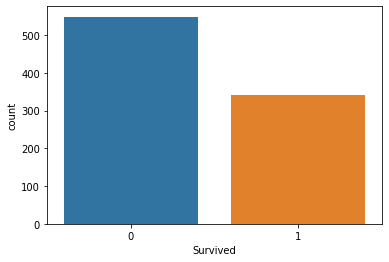

In [33]:
sns.countplot(data=simple_titanic, x='Survived')

Vemos que hay un sesgo claro a no sobrevivir en el titanic... Vamos a calcular rápidamente el ratio de supervivencia y no supervivencia sobre el total debajo. Veremos que el 

In [34]:
simple_titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [35]:
simple_titanic.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

## Visualizando relaciones y dependencias entre variables

Visualizar distribuciones y conteos es muy útil para tener una idea de cómo se comportan nuestras variables por sí mismas. ¿Hay algún intervalo donde se acumulen valores de una variable (como en edad)? ¿Hay alguna categoría que sea mucho más frecuente que las demás? ¿O mucho menos frecuente? Este tipo de preguntas son las que podemos responder con los gráficos de distribución.

Pero estos gráficos nos permiten ver la variable por sí misma, y muchas veces queremos ver la relación que existe entre dos variables. Haciendo un spoiler de modelos de Machine Learning, muchos modelos de ML se basan en resolver cientos de sistemas de ecuaciones en su forma más básica (matrices). Un gran problema que encontraremos en los sistemas de ecuaciones es el problema de la linealidad entre sus filas. Esto afectará el rendimiento de nuestros modelos y debemos intentar evitar incorporar aquellas variables que tengan una dependencia lineal entre ellas y quedarnos únicamente con una.

### Opciones para visualizar relaciones

Las visualizaciones que estudian relaciones entre variables se pueden agrupar según el tipo de variables que nos interese estudiar:

- Variable continua vs variable continua
- Variable continua vs variable categórica
- Variable categórica vs variable categórica

Podemos encontrar una guía para saber qué gráfico podemos utilizar en cada caso de [este link](https://infogram.com/page/choose-the-right-chart-data-visualization).

#### Variable continua vs variable continua

En este caso queremos graficar dos variables que pueden tomar cualquier valor, o al menos cualquier valor real dentro de un intervalo. Por lo tanto necesitamos poder ver la localización de cada punto en el espacio o ver gráficamente las zonas más densas. Para este tipo de datos podemos utilizar:

- Dos variables:
    - **Scatterplots:** Ya los hemos visto, pero son los gráficos que permiten graficar los valores de las variables como puntos en un eje de coordenadas x,y. Se les conoce como gráfico de dispersión.
    - **Lmplots:** Esto es un scatterplot en el que se intenta estimar una recta de regresión. Sirve para ver la tendencia junto con el scatterplot de fondo.
    - **Lineplot** (gráfico de línea): Es un gráfico que se utiliza cuando tenemos una relación de dependencia 1-1 entre los puntos a gráficas, como por ejemplo en una evolución histórica. Esto es muy importante, porque este gráfico espera esta dependencia 1-1 y puede tardar muchísimo para graficar dos variables que no tengan esta dependencia.
    - **Jointplots:** Estos gráficos permiten combinar la distribución individual de una variable con el scatterplot (o la función de densidad kde) en el centro.
- Múltiples variables:
    - **Correlation:** Esto suele hacerse mezclando la correlación nativa de pandas y un gráfico llamado heatmap, que nos da un mapa de calor en donde vemos qué variables correlan más o menos con cada variable del dataframe.
    - **Pair plot:*** Esto permite de una tacada visualizar todas las variables numéricas en un subplot de nxn donde n es la cantidad de variables numéricas del DataFrame. En la diagonal veremos la distribución de cada una de las variables.
    
En nuestro DataFrame simplificado no hay dos variables numéricas, así que utilizaremos el DataFrame original para graficar el precio que ha pagado el pasajero ("Fare") con su edad ("Age").

<AxesSubplot:xlabel='Age', ylabel='Fare'>

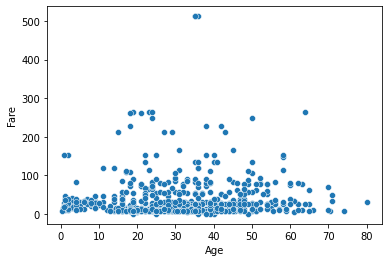

In [36]:
sns.scatterplot(data=titanic, x='Age', y='Fare')

Podemos incorporar el uso del parámetro hue para ver si hay alguna diferencia entre los que sobreviven o no, pero superpuesto a esta gráfico. Esto nos permite incorporar una variable categórica (sobrevive o no) a este análisis. Al hacerlo veremos que no hay mucha diferencia notoria entre unos y otros, salvo en los extremos. Pareciera ser que la gente más joven tiene más posibilidades de sobrevivir y que la gente mayor tiene más probabilidades de no sobrevivir (independientemente del precio que han pagado).

<AxesSubplot:xlabel='Age', ylabel='Fare'>

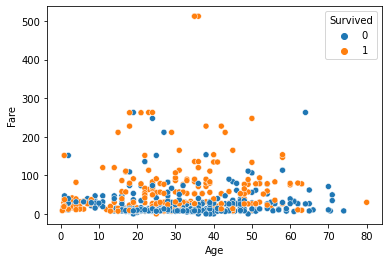

In [37]:
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')

**Si queremos utilizar un lineplot esto no funcionará porque no tenemos una dependencia uno a uno en nuestros valores**. Simplemente para mostrar cómo se utilizaría, fabricaremos datos anuales de una medida cualquiera.

<AxesSubplot:xlabel='year', ylabel='var'>

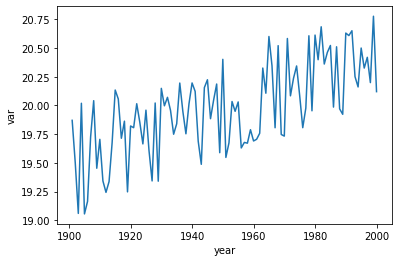

In [38]:
years = np.linspace(1901, 2000, 100)

var1 = 0.01 * years + 1 * np.random.random(100)
cat1 = 100 * ['cat1']
var2 = 0.01 * years + 0.5 * np.random.random(100)
cat2 = 100 * ['cat2']

df1 = pd.DataFrame({'year': years, 'var': var1, 'cat': cat1})
df2 = pd.DataFrame({'year': years, 'var': var2, 'cat': cat2})

df = pd.concat([df1, df2]).reset_index(drop=True)

sns.lineplot(data=df1, x='year', y='var')

<AxesSubplot:xlabel='year', ylabel='var'>

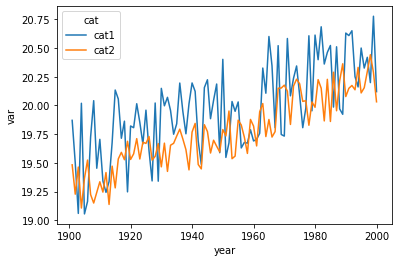

In [39]:
sns.lineplot(data=df, x='year', y='var', hue='cat')

#### Variable categórica vs continua:

Este tipo de visualización nos permite ahondar un poco más en cómo se comporta cada variable en función de si pertenece o no a una categoría. Por ejemplo, podría interesarnos visualizar la sospecha que vimos justo antes. ¿Existe alguna relación entre la edad del pasajero y su probabilidad de sobrevivir? Podemos verlo con este tipo de representaciones. Para este tipo de relación podemos utilizar:

- **Boxplots** (gráficos de caja): En este caso utilizaremos el boxplot con la variable continua en un eje y la categórica en otro. Básicamente queremos ver si la distribución de cada uno de los datos cambia en función de la edad o cualquier otra variable continua.
- **Kdeplots** (gráficos de densidad): En este caso también utilizaremos el kdeplot con hue. Básicamente queremos ver si la distribución de cada uno de los datos cambia en función de la edad o cualquier otra variable continua.
- **Violinplots**: Son una alternativa al kdeplot, y son muy buenos para incorporar una variable continua vs una o más variables categóricas. Es un gráfico muy útil para ver distribución y valores anómalos a la vez (aunque personalmente prefiero el boxplot para valores anómalos).

También hay otros como swarmplots y catplots que son versiones de scatterplots categóricos. Personalmente nunca he podido utilizarlos en la práctica, pero si queren verlos y aprender a utilizarlos sugiero este [link](https://seaborn.pydata.org/tutorial/categorical.html) de Seaborn.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

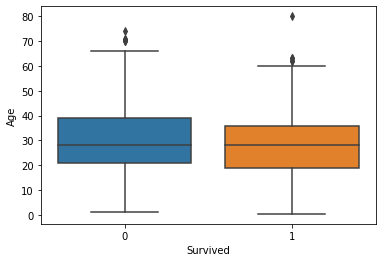

In [40]:
sns.boxplot(data=titanic, y='Age', x='Survived')

En estos boxplots podemos llegar a ver una conclusión similar a lo que vimos antes, la gente más joven es más propensa a sobrevivir, y la gente más mayor menos. Debajo veremos lo mismo con un kdeplot...

<AxesSubplot:xlabel='Age', ylabel='Density'>

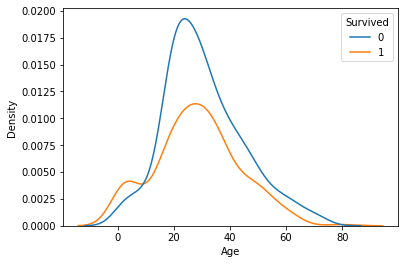

In [41]:
sns.kdeplot(data=titanic, x='Age', hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

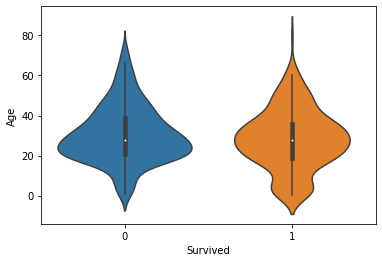

In [42]:
sns.violinplot(data=titanic, y='Age', x='Survived')

El violinplot incorpora algo más que no hemos podido ver tan claramente hasta ahora, la distribución de cada una de las variables en función de la clase que queremos ver (sobrevive o no). En este caso si vemos claramente que hay muchos más casos de superviviencia que de no supervivencia en los jovenes y menos casos de supervivencia en adultos mayores.

#### Categóricas vs categóricas

Si intentamos pensar cómo podemos graficar estos dos, la verdad es que no suele ser trivial. Esto sucede porque en realidad no solemos graficar categorías vs categorías, pero sí que existen dos métodos útiles para mostrar este tipo de datos y es utilizando crosstabs (tablas de frecuencia). Básicamente generaremos un recuento de cuantas veces se cumple cada par categoría1 - categoría2, para todas las combinaciones.

Este gráfico se puede utilizar como visualización directamente (vuelvo a hacer referencia a [este libro](https://www.storytellingwithdata.com/) en el que se explica muy bien el concepto de utilizar tablas como herramienta de visualización). También podemos utilizar un mapa de calor (heatmap) para ver aquellos valores que son más o menos frecuentes. Entonces podemos utilizar:

- Tablas de frecuencias
- Heatmap de las tablas de frecuencias

Por lo tanto, vemos que es fundamental construir una tabla de frecuencias (XD). La tabla de frecuencias se puede construir fácilmente con la función pd.crosstab() de pandas.

In [43]:
tabla_frec = pd.crosstab(index=simple_titanic['Pclass'], columns=simple_titanic['Survived'])
tabla_frec

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

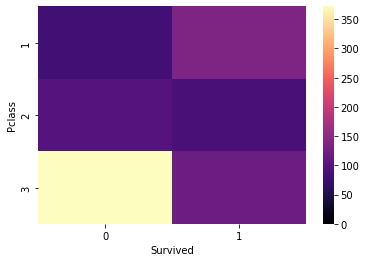

In [44]:
sns.heatmap(tabla_frec, cmap='magma', vmin=0)

Observar que en el heatmap hay dos cambios importantes:

1) **Cambio del mapa de color:** Cambiamos a una escala que sea más clara (con el argumento "cmap"). Pueden ver la referencia de colores en este [link](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

2) **Cambio de escala:** Esto es un problema muy frecuente en los mapas de calor y es que automáticamente se configuran entre el máximo y el mínimo de nuestros datos. Esto puede ser problemático porque no nos dan una referencia real de nuestros datos, sino una referencia "relativa" entre ellos. Por eso al fijar el mínimo a cero, estamos comparando todos los valores relativos a la misma escala. Si les interesa ver la diferencia, simplemente ejecutar: sns.heatmap(tabla_frec)

# Breve reseña sobre herramienta gráfica de Pandas

Pandas provee de una herramienta de visualización rápida a partir de los DataFrames. Es decir, que podemos visualizar los datos rápidamente sin importar ninguna librería utilizando el método **.plot()** de los DataFrames. La [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) de esta funcionalidad es bastante clara y sencilla de utilizar, y se construye sobre matplotlib así que también podemos aplicar los mismos cambios y modificadores sobre la figura.

Debajo se muestran solamente los argumentos más utilizados del método **.plot()** pero se recomienda visitar la documentación para ver todo lo que podemos hacer con este método.

```python
simple_titanic.plot(
    data = 'Los datos que queremos pasar. No es necesario en la mayoría de los casos porque utilizaremos el mismo DataFrame',
    x = 'El nombre de la columna que queremos en el eje x',
    y = 'El nombre de la columna que queremos en el eje y', 
    kind = 'El tipo de gráfico, puede ser "line", "bar", "hist", "scatter", y muchos más --> Ver documentación!',
    ax = 'El eje de matplotlib sobre el que queremos graficar. Si no existe, creará uno nuevo.',
    title = 'Titulo del gráfico',
    xlabel = 'Etiqueta (texto) que se mostrará en el eje x',
    ylabel = 'Etiqueta (texto) que se mostrará en el eje y'
)
```

In [45]:
simple_titanic.head()

,Age,Sex,Pclass,Survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


Text(0.5, 0, 'Class (1, 2 ,3)')

<Figure size 360x576 with 0 Axes>

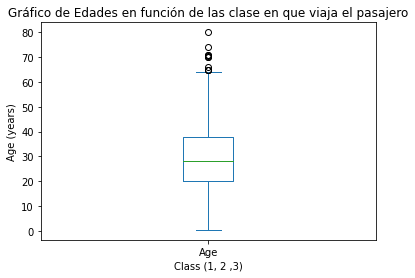

In [46]:
plt.figure(figsize=(5, 8))
simple_titanic.plot(
    x = 'Pclass',
    y = 'Age', 
    kind = 'box',
    title = 'Gráfico de Edades en función de las clase en que viaja el pasajero',
    ylabel = 'Age (years)'
)
plt.xlabel('Class (1, 2 ,3)')

## Principios de visualización

Ahora que hemos visto cómo visualizar datos y cómo utilizar algunas de las herramientas básicas de Python y pandas, veremos **6 principios de la visualización**. Estos 6 principios se definen muy bien [aqui](https://tereom.github.io/fundamentos/principios-de-visualizaci%C3%B3n.html), recomiendo esa lectura. En el texto verán que se definen los siguientes 6 principios: 

- **Principio 1.** Muestra comparaciones, contrastes, diferencias.
- **Principio 2.** Muestra causalidad, mecanismo, explicación, estructura sistemática.
- **Principio 3.** Muestra datos multivariados, es decir, más de una o dos variables.
- **Principio 4.** Integra palabras, números, imágenes y diagramas.
- **Principio 5.** Describe la totalidad de la evidencia. Muestra fuentes usadas y problemas relevantes.
- **Principio 6.** Las presentaciones analíticas, a fin de cuentas, se sostienen o caen dependiendo de la calidad, relevancia e integridad de su contenido.

Esto todo forma parte del concepto de **storytelling** con datos. No es necesario que los 6 principios estén en todas nuestras visualizaciones, pero sí que es importante cumplir con todo lo que se puede, siempre enfocado hacia la persona que utilizará nuestra visualización. No podemos ser muy técnicos si nuestro público no tiene conocimiento profundo del tema, ni podemos ser muy vagos en una presentación técnica. EL objetivo de estos principios es orientarnos a crear buenas visualizaciones, pero **lo primero que debemos crear es conocimiento de quien va a consumir nuestra visualización, y qué necesita de ella**.

### Principio de escala:

La escala en nuestros gráficos y visualizaciones es **crucial** para transmitir el mensaje que queremos a nuestro público. Muchas veces vemos cosas como la imagen que se muestra debajo que comunican un mensaje que no es el correcto. Si vemos la imagen la diferencia entre las dos cadenas de noticias es apenas de un 0,3%, pero la diferencia en el gráfico parece mostrar mucho más que eso.

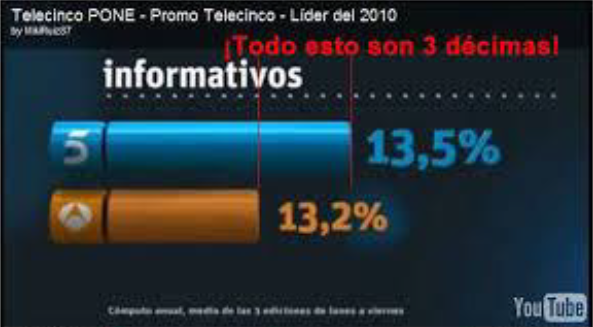

Los mismo sucede con muchos gráficos de comparaciones. Cuando mostramos comparaciones, muchas veces la escala influye en cómo se percibe la diferencia. Si hay una diferencia de un 10% pero mi escala va de 0-200%, la diferencia parecerá pequeña. En cambio si la diferencia es la misma pero graficamos solamente la diferencia, la misma parecerá mucho mayor. Esto se muestra debajo:

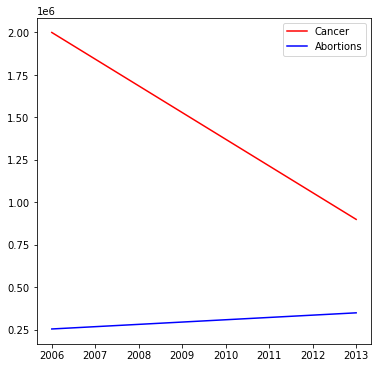

In [47]:
# Gráfico centrado en mostrar como uno es mucho mayor que el otro
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot([2006, 2013], [2000000, 900000], label='Cancer', c='red')
ax.plot([2006, 2013], [255000, 350000], label='Abortions', c='blue')
ax.legend()

Si graficamos la misma diferencia, pero ahora en términos porcentuales (cuando han cambiado respecto de ellos mismos) vemos que el cancer sigue teniendo un cambio mucho más brusco, pero igualmente la cantidad de abortos ha aumentado significativamente. Este es el tipo de cosa con la que debemos ser cuidadosos. En ambos casos lo que estamos graficando está bien, simplemente que se aprecian más las diferencias de **ambos** en el segundo gráfico, mientras que se aprecia más el cambio de uno solo en el primer gráfico.

(-0.5, 1.5)

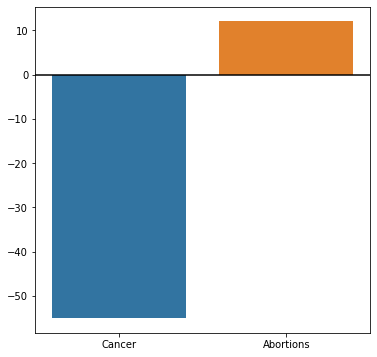

In [48]:
# Gráfico centrado en la diferencia
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.barplot(x=['Cancer', 'Abortions'], y=[-55, 12])
plt.plot([-1, 2], [0,0], c='k')
plt.xlim([-0.5, 1.5])

Otra situación muy común en las escalas son las distribuciones de cola pesada que ya hemos visto. Imaginemos que tenemos que elaborar un gráfico de sueldos y nos interesa mostrar como la mayoría de los trabajadores se encuentran entre ciertos valores. Si queremos mostrar eso, el gráfico a continuación hace un trabajo muy malo, porque centra nuestra atención en los valores anómalos, en lugar de los valores más frecuentes:

<AxesSubplot:ylabel='Count'>

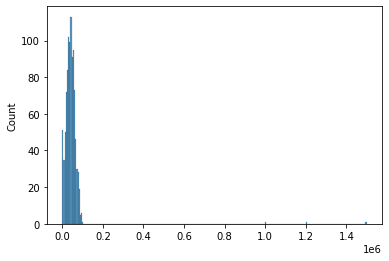

In [49]:
np.random.seed(101)
sueldos = np.random.normal(40000, 20000, 1000)
sueldos = sueldos.clip(min=0)
sueldos = np.append(sueldos, np.array([1200000, 1000000, 1500000]))

sns.histplot(sueldos)

Resulta muy dificil ver en este caso los valores que nos interesan (los más frecuentes). En estos casos puede ser más útil simplemente cortar el gráfico y visualizar solamente los valores de sueldo menores a 200.000 euros. Veremos debajo una forma de hacerlo. Vean como ahora si podemos ver claramente cuales son los puntos de mayor y menor acumulación. Si quisiéramos mostrar valores anómalos junto con esto, podríamos incorporar un boxplot dentro de un subplot y ver las dos a la vez.

Text(0.5, 1.0, 'Gráfico para visualizar valores extremos')

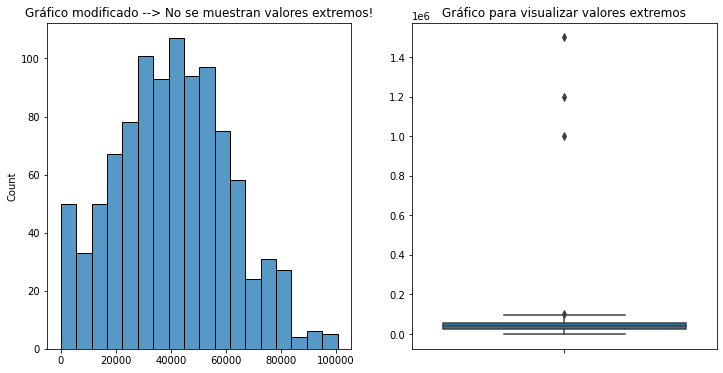

In [50]:
sueldos_modif = sueldos[sueldos <= 200000]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(sueldos_modif, ax=ax[0])
sns.boxplot(y=sueldos, ax=ax[1])

ax[0].set_title('Gráfico modificado --> No se muestran valores extremos!')
ax[1].set_title('Gráfico para visualizar valores extremos')

### Principio de percepción

Existe otro tema importante conocido como el concepto de percepción, que afecta principalmente al color. La elección de la escala de colores en los gráficos es muy importante para la claridad y es algo que generalmente se nos olvida incorporar. Los colores, así como los gráficos, comentarios y todo lo que agregemos a la figura deben intentar complementar la historia que queremos contar.

Si queremos establecer una **diferenciación** entre categorías debemos utilizar colores que no se parezcan. Generalmente las herramientas para graficar hacen un trabajo decente en esta área porque sus paletas predeterminadas para los gráficos categóricos suelen tener al menos 10 colores notoriamente distintos entre sí. Esto empieza a ser más importante cuando tenemos más categorías. Debajo se ven los mapas de colores **cualitativos** (otra palabra para categóricos) de matplotlib.

Si queremos establecer un **cambio progresivo o lento** debemos utilizar colores similares entre sí. Una escala de color en un solo tono y variando la intensidad blanco a negro puede ser una buena opción en estos casos. Matplotlib introduce el concepto de escalas de colores **secuenciales** que sirven para denotar esto. Podemos encontrar estos mapas de colores en [este link](https://matplotlib.org/stable/gallery/color/colormap_reference.html), en la parte de "Sequential colormaps" y "Sequential (2) colormaps".

Si queremos mostrar dos contrastes grandes entre extremos y no tanto lo que sucede en el medio de la escala, existe otro tipo de escala llamada **escala divergente**. Las escalas divergentes generalmente tienen el blanco en el centro y dos colores opuestos en los extremos. Esto hará que estos colores se resalten más cuanto más extremos sean los valores.

#### Otros problemas de percepción

Existe otro problema de percepción muy común asociado a distinguir escalas que no son habituales para nosotros. Generalmente somos muy malos para distinguir cambios en escalas que no son lineales, que no tienen una diferencia lineal, que son angulares o de áreas. Debajo se muestran dos ejemplos. El primero ya lo hemos mencionado, y es que las gráficas de tartas son muy dificiles de interpretar cuando los porcentajes que expresan son muy similares, siempre es mejor utilizar barras en ese caso! [ver esta imagen](https://www.w3schools.com/python/img_matplotlib_pie1.png) y comparar el color verde con el amarillo.

El segundo ejemplo es una extensión de este problema a los gráficos de áreas. Los seres humanos no somos buenos para cuantificar diferencias de áreas en términos lineales. Si miramos [esta](https://datavizproject.com/wp-content/uploads/2015/10/Sk%C3%A6rmbillede-2016-01-25-kl.-14.01.24.png) segunda imágen, veremos que los cuadrados de Xbox y Samsung muestran un número que es el triple para Xbox que para Samsung, pero los cuadrados no parecen ser la tercera parte.

Otro gráfico que deberíamos evitar es el de barras apiladas, siempre que sea posible. Este gráfico se ve bien, pero en realidad es muy dificil de leer porque la base cambia a medida que nos desplazamos en la imagen. Esto hace que cuando queremos comparar dos valores no podamos hacerlo intuitivamente. A pesar de verse muy bien, estos gráficos no son muy amigables! [ejemplo aquí](https://docs.tibco.com/pub/spotfire_web_player/7.0.0/doc/html/es_ES/GUID-23CD5654-4211-44BD-89FA-712457D04EC7-display.png)

### Herramientas útiles --> Transformaciones

Finalmente, veremos un puente entre la estadística y la visualización, las **transformaciones** de variables. Básicamente, muchas veces nos interesará que nuestras variables tengan ciertas propiedades para hacer más sencillo su estudio o porque los algoritmos de ML lo requieren. En estos casos debemos aplicar transformaciones y/o reescalados para poder obtener mejores resultados. Veremos dos tipos de transformaciones:

- Reescalados
- Transformaciones logarítmicas/de potencia

## Reescalado (Normalización)

El reescalado es una técnica que nos permite cambiar la escala de nuestros datos. Existen técnicas de reescalado muy sencillas como desplazar los ejes restando un valor, o reducir la magnitud dividiendo entre un valor. También existen técnicas más complejas como veremos a continuación. El **objetivo** del escalado de datos suele ser llevar todas nuestras variables a una **medida comparable**.

Esto es muy importante en muchos métodos de Machine Learning, principalmente en aquellos basados en distancias euclideas (o cualquier tipo de distancia geométrica), como lo son los métodos de **K-Means** o **Regresión Logística**. Los métodos basados en distancia penalizan mucho a las variables de menor magnitud, y una forma de prevenirlo es medir todas las variables con "la misma regla".

#### Min/Max

Una primera técnica de reescalado es la del máximo/mínimo. Ésta técnica mide la relación entre la distancia de cada punto al valor mínimo y la distancia entre el valor máximo y mínimo. Básicamente para cada valor de la columna, calculamos la diferencia entre el valor y el valor mínimo de la columna, y lo dividimos entre la diferencia entre el máximo y el mínimo de la columna. La formalización matemática de esto sería:

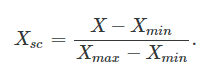

Una implementación sencilla del reescalado por máximo y mínimo en Python podría ser el que se muestra debajo. Se pueden hacer implementaciones más sencillas y más rápidas, pero lo interesante de la implementación que tenemos debajo es que no necesitamos preocuparnos por seleccionar las columnas numéricas, sino que lo hace por nosotros. Esto reescalará las columnas que correspondan y las demás quedarán tal cual están.

```python
from pandas.api.types import is_numeric_dtype

def reescalado_columna(col):
    denominator = col.max() - col.min()
    return (col - col.min()) / denominator

def reescalado_min_max(df):
    # We create a copy of the dataframe to keep the original intact
    df_copy = df.copy()
    
    for column in df_copy.columns:
        if is_numeric_dtype(df_copy[column]):
            df_copy[column] = reescalado_columna(df_copy[column])
            
    return df_copy
```

In [51]:
from pandas.api.types import is_numeric_dtype

def reescalado_columna(col):
    denominator = col.max() - col.min()
    return (col - col.min()) / denominator

def reescalado_min_max(df):
    # We create a copy of the dataframe to keep the original intact
    df_copy = df.copy()
    
    for column in df_copy.columns:
        if is_numeric_dtype(df_copy[column]):
            df_copy[column] = reescalado_columna(df_copy[column])
            
    return df_copy

In [52]:
test = pd.DataFrame({'A': [0, 2, 50, 100], 'B': ['a', 'b', 'c', 'd']})

reescalado_min_max(test)

,A,B
0,0.00,a
1,0.02,b
2,0.50,c
3,1.00,d


#### Estandarización

La estandarización es otro método típico de reescalado. En este caso, queremos transformar las variables numéricas de su escala actual, a una escala medida en **"cantidad de desviaciones estándar respecto de la media"**. Se trata de calcular la diferencia entre los elementos de la columna y la media de la columna, y dividirlos entre la desviación estándar de la columna. Matemáticamente sería la fórmula que vemos debajo, que se conoce como **Z-score**

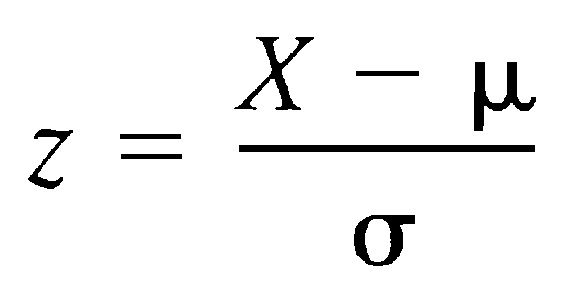

Al igual que antes, vamos a implementar una solución para poder reescalar utilizando esta métrica. Nuevamente intentaremos que sea lo más sencillo posible, para que podamos pasarle el dataframe entero y nos devuelva las columnas reescaladas con el Z-score calculado solamente para aquellas columnas numéricas.

In [53]:
from pandas.api.types import is_numeric_dtype

def reescalado_columna_zscore(col):
    denominator = col.std()
    return (col - col.mean()) / denominator

def reescalado_zscore(df):
    # We create a copy of the dataframe to keep the original intact
    df_copy = df.copy()
    
    for column in df_copy.columns:
        if is_numeric_dtype(df_copy[column]):
            df_copy[column] = reescalado_columna_zscore(df_copy[column])
            
    return df_copy

In [54]:
reescalado_zscore(test)

,A,B
0,-0.802419,a
1,-0.760186,b
2,0.253395,c
3,1.309210,d


### Ventajas y desventajas de cada método:

- **Min/Max**:
    - Ventajas:
        - Muy sencillo de calcular
        - Los valores están acotados entre 0 y 1
        - Es estrictamente positivo
    - Desventajas:
        - Es muy sensible a valores anómalos
       
- **Estandarización**:
    - Ventajas:
        - Es menos sensible a valores anómalos
        - Es muy sencilla de calcular
    - Desventajas:
        - Puede tomar valores negativos
        - Los valores no están acotados (puede ser una ventaja también)

### Comentarios sobre Data Leakage

Hasta ahora solo hemos hablado de escalado, pero es importante hacer énfasis en un problema habitual que se introduce en las transformaciones (y en otros procesos de Machine Learning), el **Data Leakage**. Este fenómeno se da cuando introducimos información al modelo con la que no deberíamos contar a la hora de entrenarlo. Lo veremos más adelante, pero en ML siempre dividiremos nuestros datos en al menos dos conjuntos, uno para **entrenar modelos** y otro(s) para **validar que el modelo funciona correctamente**. Éstos últimos deben ser nuevos para el modelo (nunca vistos durante el entrenamiento) para asegurarnos que el modelo generaliza bien!

El Data Leakage se da cuando introducimos información sobre estos datos con los que **validamos** el modelo al entrenamiento. Introducir datos de otro conjunto de datos parece ser algo bastante complicado de hacer mal, pero existe una situación en la que solemos introducir este tipo de errores a nuestros modelos y es justamente en el **reescalado y transformación de los datos**. Esto sucede porque muchas veces transformamos los datos antes de separarlos en estos conjuntos!

Si hacemos esto y utilizamos por ejemplo el reescalado por estandarización, estaremos utilizando la **media** y la **desviación estándar** contando datos de este conjunto. Esa información se está "filtrando" a nuestro modelo.

Para evitar esto, se suele recomendar dividir en estos dos conjuntos lo antes posible, y solo utilizar la media y desviación estándar del conjunto de entrenamiento (o el máximo y mínimo en el caso del Min/Max).

## Transformaciones:

Otro proceso común en ciencia de datos es el de transformar variables cambiando la escala. Las relaciones lineales generalmente son las más sencillas de interpretar y muchas veces si aplicamos una transformación específica y obtenemos un resultado lineal sabemos exactamente qué tipo de dependencia tendremos entre dos variables. Veamos a qué nos referimos con un ejemplo. Vamos a crear un dataset con una dependencia exponencial en el eje y, y aplicaremos una transformación para ver si podemos interpretarla mejor.

<AxesSubplot:>

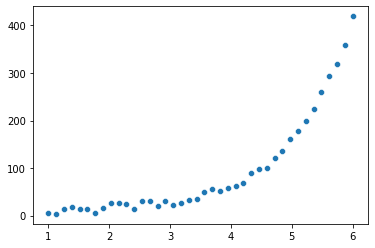

In [55]:
num_points = 40

X = np.linspace(1, 6, num_points)
np.random.seed(11)
y = np.exp(X) + np.random.random(num_points) * 20

sns.scatterplot(x=X, y=y)

En este caso sabemos que hay una relación exponencial entre X e y, pero si en la práctica no lo sabemos, pero vemos que la dependencia no es lineal. En estos casos puede ser interesante aplicar una transformación logarítmica a la variable y y ver si podemos "linealizar" el resultado. Si podemos linealizar el resultado, veremos una relación más clara y podemos inferir el tipo de relación que tienen x e y.

<AxesSubplot:>

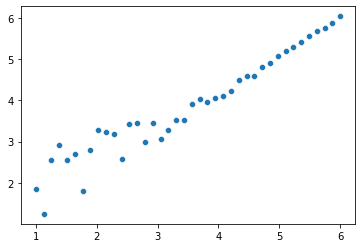

In [56]:
y_log = np.log(y)

sns.scatterplot(x=X, y=y_log)

Si planteamos lo que acabamos de ver como una relación lineal entre el logaritmo de la variable y, y la variable x, tenemos:

\begin{equation}\label{eq:ej}
log(y) = ax + b
\end{equation}

\begin{equation}\label{eq:ej1}
e^{log(y)} = e^{ax + b}
\end{equation}

\begin{equation}\label{eq:ej2}
y = e^{ax}e^{b}
\end{equation}

\begin{equation}\label{eq:ej0}
y = Ce^{ax}
\end{equation}

Por lo tanto, vemos que la relación entre x e y originalmente era exponencial (en este caso ya lo sabíamos, pero en la práctica no).

#### Dependencia y transformación de potencia

Otra dependencia que podemos descubrir al aplicar transformaciones logarítmicas es la de las relaciones de potencias. Vamos a verlo con un ejemplo similar al anterior.

<AxesSubplot:>

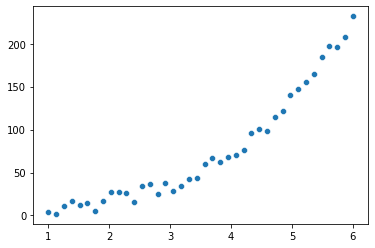

In [57]:
num_points = 40

X = np.linspace(1, 6, num_points)
np.random.seed(11)
y = np.power(X, 3) + np.random.random(num_points) * 20

sns.scatterplot(x=X, y=y)

Ahora aplicamos la transformación logarítmica a ambos ejes (x e y) y vermos que volvemos a obtener una relación lineal con las variables transformadas.

<AxesSubplot:>

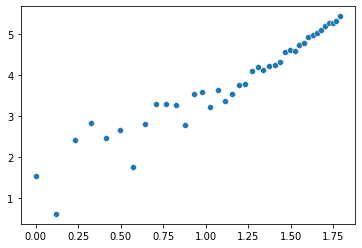

In [58]:
sns.scatterplot(x=np.log(X), y=np.log(y))

Esto quiere decir que podemos deshacer el cambio y encontrar la relación original entre variables.

\begin{equation}\label{eq:ej}
log(y) = a*log(x) + b
\end{equation}

\begin{equation}\label{eq:ej1}
e^{log(y)} = e^{a*log(x) + b}
\end{equation}

\begin{equation}\label{eq:ej2}
y = e^{a*log(x)}e^{b}
\end{equation}

\begin{equation}\label{eq:ej0}
y = Cx^{a}
\end{equation}

Nuevamente encontramos la relación que utilizamos para generar la variable y. En nuestro caso particular utilizamos a=3!

### Sklearn

Sklearn es la librería que utilizaremos para Machine Learning. Es una librería muy robusta y tiene muchas funcionalidades más allá de los modelos de Machine Learning ya implementados. Uno de ellos es que incluye muchísimas librerías para aplicar transformaciones a los datos. Las librerías que están incluidas en sklearn pueden verse [aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) pero también quedan como ejercicio para el lector (aunque algunas ya las hemos spoileado en el notebook)! Utilizaremos:

- MinMaxScaler --> Escalar por máximo/mínimo
- StandardScaler --> Normaliza restando la media y dividiendo entre la desviación estándar.
- MaxAbsScaler
- PowerTransform --> Transformaciones logarítmicas y/o de potencia

Todos estos elementos tienen la misma API, lo que los hace muy sencillos de utilizar. El formato es (suponiendo que usaremos MinMaxScaler):
```python
from sklearn.preprocessing import MinMaxScaler

# Generamos una instancia de la función escaladora
# Esta función se entrena con los datos como si fuera un modelo
scaler = MinMaxScaler()

# Método 1
scaler.fit(data_entrenamiento)
X_train = scaler.transform(data_entrenamiento)
X_test  = scaler.transform(data_test)

# También está el método fit_transform que hace el fit y el transform a la vez, pero debemos tener cuidado de solo aplicarlo al conjunto de entrenamiento!
X_train = scaler.fit_transform(data_entrenamiento)
X_test  = scaler.transform(data_test)
```

# Ejercicios

Los ejercicios están pensados para hacerse con los datos de este notebook (titanic).

1) Supongamos que queremos mostrar la distribución de la variable edad en un gráfico con un histograma (esto se puede hacer con plt.hist("columna que queremos graficar"). También se puede utilizar sns.histplot()

2) Ahora queremos detectar visualmente si hay candidatos a outliers. Eso podemos hacerlo con un boxplot (para esto recomiendo Seaborn,sns.boxplot). Aunque también podemos hacerlo con df.boxplot(column= , by= )

3) Ahora queremos graficar estos dos ejercicios anteriores pero en un subplot de 2x1 (2 filas y una columna)

4) Ahora queremos generar dos gráfico que muestren el histograma de edades y géneros de los viajeros (recomendación utilizar un sns.histplot). Hacerlo en dos histogramas distintos, uno para hombres y otro para mujeres

5) Ahora hacer lo mismo pero en el mismo gráfico (recomiendo utilizar sns.displot en lugar de histplot para esto)

6) Elegir dos gráficos y nombrar los ejes y títulos correctamente. Pensar en unidades de lo que estamos midiendo.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Age'>

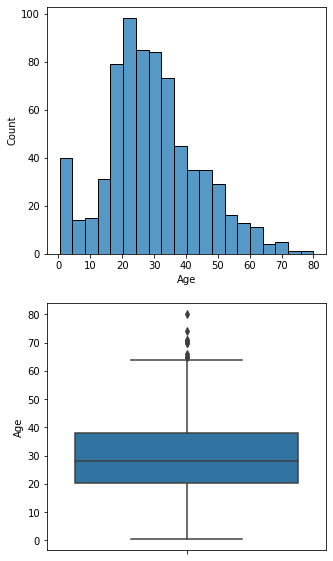

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10))

sns.histplot(data=df, x='Age', ax=ax1)
sns.boxplot(data=df, y='Age', ax=ax2)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Presentando resultados

Para que este notebook esté activo, necesitamos presentar una predicción. Así que, sin saber nada de ML, generaremos un modelo para predecir si los pasajeros sobreviven o no. El objetivo de este modelo no es obtener el mejor resultado posible, sino solamente presentar el resultado para que el notebook sea público y puedan acceder.Vamos a crear un pipeline para preprocesar los datos (esto es porque veremos que hay una dataset de entrenamiento y uno de test --> no nos preocupa ahora).

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
train_original = pd.read_csv('../input/titanic/train.csv')
test_original  = pd.read_csv('../input/titanic/test.csv')

In [65]:
scaler = StandardScaler()
scaler.fit(train_original['Age'].dropna().values.reshape(-1, 1))

def preprocessing_pipeline(df, is_test=False, scaler=scaler):
    mean_age = df.groupby('Pclass')['Age'].mean()
    pclasses = mean_age.index
    
    for pclass, avg_age in zip(pclasses, mean_age):
        df.loc[(df['Age'].isna()) & (df['Pclass'] == pclass), 'Age'] = avg_age
    
    if is_test:
        list_columns = ['PassengerId', 'Age', 'Pclass', 'Sex', 'Embarked']
    else:
        list_columns = ['PassengerId', 'Age', 'Pclass', 'Sex', 'Embarked', 'Survived']
        
    simple_df = (
        df[list_columns]
        .assign(
            Sex = df['Sex'].map({'male': 1, 'female': 0}),
            Age = scaler.transform(df['Age'].values.reshape(-1, 1))
        )
    )
    
    new_columns = pd.get_dummies(simple_df['Embarked'], drop_first=True)
    simple_df = pd.concat([simple_df, new_columns], axis=1).drop('Embarked', axis=1)
        
    return simple_df

In [66]:
train_data = preprocessing_pipeline(train_original)
test_data  = preprocessing_pipeline(test_original, True)

X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)
y_train = train_data['Survived']

X_test = test_data.drop('PassengerId', axis=1)

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb = XGBClassifier(n_estimators=100, max_depth=3)   # lr = LogisticRegrerssion(random_state=101, max_iter=1000)

xgb.fit(X_train, y_train)  # logr.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
train_pred = xgb.predict(X_train)

In [70]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89       549
           1       0.88      0.75      0.81       342

    accuracy                           0.86       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.86      0.86      0.86       891



In [71]:
print(confusion_matrix(y_train, train_pred))

[[514  35]
 [ 87 255]]


Vean que sin mucho esfuerzo hemos conseguido predecir con un 80% de precisión si el pasajero sobrevive o no, basándonos únicamente en su edad, género y la clase en la que ha subido al barco.

In [72]:
preds = xgb.predict(X_test)

In [73]:
real_result = pd.read_csv('../input/titanic/gender_submission.csv')
y_test = real_result['Survived']

In [74]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       266
           1       0.84      0.75      0.79       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.84       418
weighted avg       0.86      0.86      0.86       418



In [75]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': preds})
submission.to_csv('./submissionv3.csv', index=False)